In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import os
plt.rcParams["figure.figsize"] = (20,10)


In [2]:
os.chdir ('C:\\Users\\USER\\Downloads\\Batch 98 Day 28\\CS 21 Ans -Data Maniputations-1')

df = pd.read_csv('HollywoodMovies.csv', delimiter=',')

df.head()

,Movie,LeadStudio,RottenTomatoes,AudienceScore,Story,Genre,TheatersOpenWeek,OpeningWeekend,BOAvgOpenWeekend,DomesticGross,ForeignGross,WorldGross,Budget,Profitability,OpenProfit,Year
0,Spider-Man 3,Sony,61.0,54.0,Metamorphosis,Action,4252.0,151.1,35540.0,336.53,554.34,890.87,258.0,345.30,58.57,2007
1,Shrek the Third,Paramount,42.0,57.0,Quest,Animation,4122.0,121.6,29507.0,322.72,476.24,798.96,160.0,499.35,76.00,2007
2,Transformers,Paramount,57.0,89.0,Monster Force,Action,4011.0,70.5,17577.0,319.25,390.46,709.71,150.0,473.14,47.00,2007
3,Pirates of the Caribbean: At World's End,Disney,45.0,74.0,Rescue,Action,4362.0,114.7,26302.0,309.42,654.00,963.42,300.0,321.14,38.23,2007
4,Harry Potter and the Order of the Phoenix,Warner Bros,78.0,82.0,Quest,Adventure,4285.0,77.1,17998.0,292.00,647.88,939.89,150.0,626.59,51.40,2007


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970 entries, 0 to 969
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Movie             970 non-null    object 
 1   LeadStudio        961 non-null    object 
 2   RottenTomatoes    913 non-null    float64
 3   AudienceScore     907 non-null    float64
 4   Story             641 non-null    object 
 5   Genre             691 non-null    object 
 6   TheatersOpenWeek  949 non-null    float64
 7   OpeningWeekend    969 non-null    float64
 8   BOAvgOpenWeekend  945 non-null    float64
 9   DomesticGross     970 non-null    float64
 10  ForeignGross      876 non-null    float64
 11  WorldGross        914 non-null    float64
 12  Budget            897 non-null    float64
 13  Profitability     896 non-null    float64
 14  OpenProfit        895 non-null    float64
 15  Year              970 non-null    int64  
dtypes: float64(11), int64(1), object(4)
memory u

1. Find Rating 


In [4]:
selected_columns = df.loc[:, ['Movie', 'AudienceScore', 'Story']]
highest_rated = ""
rating = 0

for i in range(0, 970):
    if selected_columns.loc[i]['Story'] in ('Quest','quest') and selected_columns.loc[i]['AudienceScore'] > rating:
        rating = selected_columns.loc[i]['AudienceScore']
        highest_rated = selected_columns.loc[i]['Movie']

print(highest_rated,'-', rating)


Into the Wild - 90.0


2. Find the genre in which there has been the greatest number of movie releases


Genre and number of movies in each Genre

In [5]:
genre = df.loc[:, ['Genre']]

frequency = dict()
for i in range(0, 970):
    if genre.loc[i][0] in frequency:
        frequency[str(genre.loc[i]['Genre'])] += 1
    else:
        frequency[str(genre.loc[i]['Genre'])] = 1
print(frequency)


{'Action': 166, 'Animation': 51, 'Adventure': 30, 'Thriller': 35, 'Comedy': 177, 'Musical': 4, 'Drama': 109, 'Biography': 14, 'Horror': 52, 'Romance': 20, 'Fantasy': 6, 'Documentary': 7, 'Crime': 15, 'nan': 1, 'Mystery': 5}


Sort the frequency dictionary based on Values

In [6]:
frequency_sorted = sorted(frequency.items(), key=lambda x: x[1], reverse=True)

In [7]:
frequency_sorted

[('Comedy', 177),
 ('Action', 166),
 ('Drama', 109),
 ('Horror', 52),
 ('Animation', 51),
 ('Thriller', 35),
 ('Adventure', 30),
 ('Romance', 20),
 ('Crime', 15),
 ('Biography', 14),
 ('Documentary', 7),
 ('Fantasy', 6),
 ('Mystery', 5),
 ('Musical', 4),
 ('nan', 1)]

Print the sorted value based on index

In [8]:
for i in frequency_sorted:
    print(i[0],'->',i[1])

Comedy -> 177
Action -> 166
Drama -> 109
Horror -> 52
Animation -> 51
Thriller -> 35
Adventure -> 30
Romance -> 20
Crime -> 15
Biography -> 14
Documentary -> 7
Fantasy -> 6
Mystery -> 5
Musical -> 4
nan -> 1


Genre in which there has been the maximum number of movies released

In [9]:
frequency_sorted[0]

('Comedy', 177)

Genre in which there has been the minimum number of movies released

In [10]:
frequency_sorted[-1]

('nan', 1)

3. Print the names of the top five movies with the costliest budgets.

In [11]:
Top_5_budget_movies = df.sort_values(by = 'Budget',ascending=False)

In [12]:
Top_5_budget_movies[['Movie','Budget']].head()

,Movie,Budget
3,Pirates of the Caribbean: At World's End,300.0
468,Tangled,260.0
0,Spider-Man 3,258.0
778,The Dark Knight Rises,250.0
241,Harry Potter and the Half-Blood Prince,250.0


In [13]:
Bottom_5_budget_movies = df.sort_values(by = 'Budget',ascending=True)

In [14]:
Bottom_5_budget_movies[['Movie','Budget']].head()

,Movie,Budget
220,Soul Men,0.0
518,Another Earth,0.2
172,Fireproof,0.5
933,Fruitvale Station,1.0
968,John Dies at the End,1.0


4. Is there any correspondence between the critics’ evaluation of a movie and its acceptance by the public? Find out, by plotting the net profitability of a movie against the ratings it receives on Rotten Tomatoes.

In [15]:
profit = df.loc[:,['Profitability','RottenTomatoes']]

In [16]:
profit

,Profitability,RottenTomatoes
0,345.30,61.0
1,499.35,42.0
2,473.14,57.0
3,321.14,45.0
4,626.59,78.0
...,...,...
965,77.21,22.0
966,527.48,43.0
967,NaN,42.0
968,14.20,61.0


<function matplotlib.pyplot.show(close=None, block=None)>

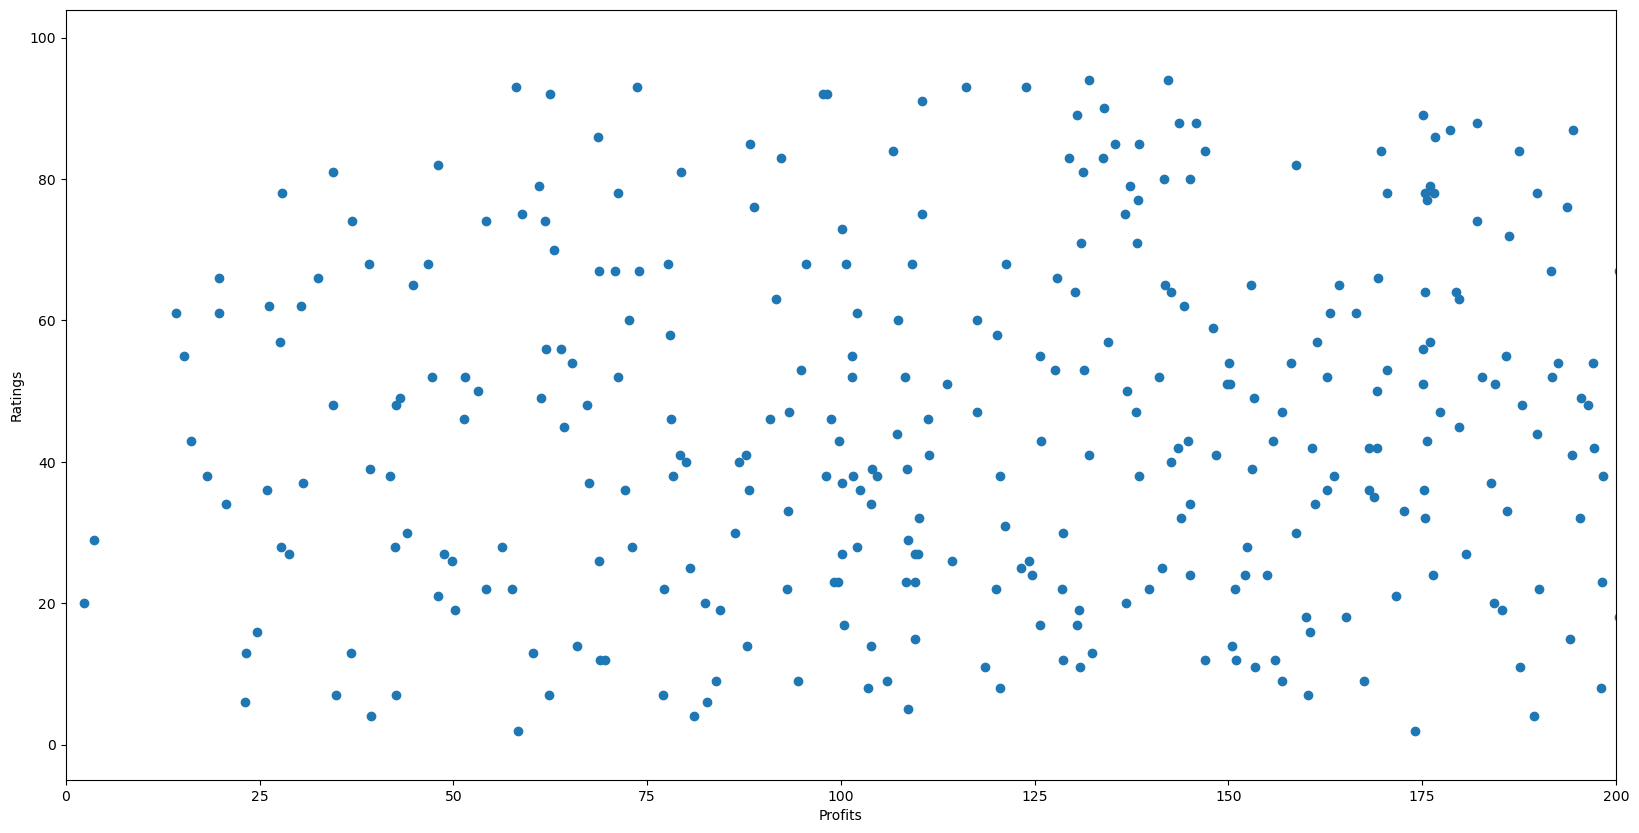

In [17]:
plt.scatter(profit['Profitability'],profit['RottenTomatoes'])
plt.xlim(0,200)
plt.xlabel('Profits')
plt.ylabel('Ratings')
plt.show

Perform Operations on Files

5.1 From the raw data below create a data frame

'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],

'last_name': ['Miller', 'Jacobson', ".", 'Milner', 'Cooze'],

'age': [42, 52, 36, 24, 73],

'preTestScore': [4, 24, 31, ".", "."],

'postTestScore': ["25,000", "94,000", 57, 62, 70]


In [18]:
data = {'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],

'last_name': ['Miller', 'Jacobson', ".", 'Milner', 'Cooze'],

'age': [42, 52, 36, 24, 73],

'preTestScore': [4, 24, 31, ".", "."],

'postTestScore': ["25,000", "94,000", 57, 62, 70]}

In [19]:
data

{'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
 'last_name': ['Miller', 'Jacobson', '.', 'Milner', 'Cooze'],
 'age': [42, 52, 36, 24, 73],
 'preTestScore': [4, 24, 31, '.', '.'],
 'postTestScore': ['25,000', '94,000', 57, 62, 70]}

In [20]:
df_2 = pd.DataFrame(data,columns = ['first_name','last_name','age','preTestScore','postTestScore'])

In [21]:
df_2

,first_name,last_name,age,preTestScore,postTestScore
0,Jason,Miller,42,4,"25,000"
1,Molly,Jacobson,52,24,"94,000"
2,Tina,.,36,31,57
3,Jake,Milner,24,.,62
4,Amy,Cooze,73,.,70


5.2: Save the dataframe into a csv file as example.csv

In [22]:
df_3 = pd.DataFrame(data,columns = ['first_name','last_name','age','preTestScore','postTestScore'])

In [23]:
df_3.to_csv('example.csv')

5.3: Read the example.csv and print the data frame

In [24]:
df_4=pd.read_csv('example.csv')

In [25]:
df_4

,Unnamed: 0,first_name,last_name,age,preTestScore,postTestScore
0,0,Jason,Miller,42,4,"25,000"
1,1,Molly,Jacobson,52,24,"94,000"
2,2,Tina,.,36,31,57
3,3,Jake,Milner,24,.,62
4,4,Amy,Cooze,73,.,70


5.4: Read the example.csv without column heading

In [26]:
df_5=pd.read_csv('example.csv',header=None)

In [27]:
df_5

,0,1,2,3,4,5
0,NaN,first_name,last_name,age,preTestScore,postTestScore
1,0.0,Jason,Miller,42,4,"25,000"
2,1.0,Molly,Jacobson,52,24,"94,000"
3,2.0,Tina,.,36,31,57
4,3.0,Jake,Milner,24,.,62
5,4.0,Amy,Cooze,73,.,70


5.5: Read the example.csv and make the index columns as 'First Name’ and 'Last Name'

In [28]:
df_6 = pd.read_csv('example.csv', 
                 index_col=['First Name', 'Last Name'],
                 names=['UID', 'First Name',
                        'Last Name', 'Age',
                        'Pre-Test Score',
                        'Post-Test Score'])

In [29]:
df_6

,,UID,Age,Pre-Test Score,Post-Test Score
First Name,Last Name,,,,
first_name,last_name,NaN,age,preTestScore,postTestScore
Jason,Miller,0.0,42,4,"25,000"
Molly,Jacobson,1.0,52,24,"94,000"
Tina,.,2.0,36,31,57
Jake,Milner,3.0,24,.,62
Amy,Cooze,4.0,73,.,70


5.6: Print the data frame in a Boolean form as True or False. True for Null/ NaN values and false for non-null values

In [30]:
df_7 = pd.read_csv('example.csv', na_values=['.'])
pd.isnull(df_7)

,Unnamed: 0,first_name,last_name,age,preTestScore,postTestScore
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,True,False,False,False
3,False,False,False,False,True,False
4,False,False,False,False,True,False


5.7: Read the dataframe by skipping first 3 rows and print the data frame

In [31]:
df_8 = pd.read_csv('example.csv', skiprows=3)
df_8

,2,Tina,.,36,31,57
0,3,Jake,Milner,24,.,62
1,4,Amy,Cooze,73,.,70


5.8: Load a csv file while interpreting "," in strings around numbers as thousands seperators. Check the raw data 'postTestScore' column has, as thousands separator. Comma should be ignored while reading the data. It is default behaviour, but you need to give argument to read_csv function which makes sure commas are ignored.

In [32]:
df_9 = pd.read_csv('example.csv',  thousands=',')
df_9


,Unnamed: 0,first_name,last_name,age,preTestScore,postTestScore
0,0,Jason,Miller,42,4,25000
1,1,Molly,Jacobson,52,24,94000
2,2,Tina,.,36,31,57
3,3,Jake,Milner,24,.,62
4,4,Amy,Cooze,73,.,70


6. Perform Operations on Files

6.1: From the raw data below create a Pandas Series

'Amit', 'Bob', 'Kate', 'A', 'b', np.nan, 'Car', 'dog', 'cat'



In [33]:
series = pd.Series(['Amit', 'Bob', 'Kate', 'A', 'b', np.nan, 'Car', 'dog', 'cat'])

a) Print all elements in lower case

In [34]:
series.str.lower()

0    amit
1     bob
2    kate
3       a
4       b
5     NaN
6     car
7     dog
8     cat
dtype: object

b) Print all the elements in upper case

In [35]:
series.str.upper()

0    AMIT
1     BOB
2    KATE
3       A
4       B
5     NaN
6     CAR
7     DOG
8     CAT
dtype: object

c) Print the length of all the elements

In [36]:
series.str.len()

0    4.0
1    3.0
2    4.0
3    1.0
4    1.0
5    NaN
6    3.0
7    3.0
8    3.0
dtype: float64

6.2: From the raw data below create a Pandas Series

' Atul', 'John ', ' jack ', 'Sam'


In [37]:
series_2 = pd.Series([' Atul', 'John ', ' jack ', 'Sam'])

a) Print all elements after stripping spaces from the left and right

In [38]:
series_2.str.strip()

0    Atul
1    John
2    jack
3     Sam
dtype: object

b) Print all the elements after removing spaces from the left only

In [39]:
series_2.str.lstrip()

0     Atul
1    John 
2    jack 
3      Sam
dtype: object

c) Print all the elements after removing spaces from the right only

In [40]:
series_2.str.rstrip()

0     Atul
1     John
2     jack
3      Sam
dtype: object

6.3: - Create a series from the raw data below
'India_is_big', 'Population_is_huge', np.nan, 'Has_diverse_culture'

In [41]:
series_3 = pd.Series(['India_is_big', 'Population_is_huge', np.nan, 'Has_diverse_culture'])

a) split the individual strings wherever ‘_’ comes and create a list out of it.

In [42]:
series_3.str.split('_')

0           [India, is, big]
1     [Population, is, huge]
2                        NaN
3    [Has, diverse, culture]
dtype: object

b) Access the 1st Element individual element of a list

In [43]:
series_3.str.split('_').str.get(1)

0         is
1         is
2        NaN
3    diverse
dtype: object

c) Expand the elements so that all individual elements get splitted by ‘_’ and insted of list returns individual elements

In [44]:
series_3.str.split('_',expand=True)

,0,1,2
0,India,is,big
1,Population,is,huge
2,NaN,NaN,NaN
3,Has,diverse,culture


6.4 Create a series 

A', 'B', 'C', 'AabX', 'BacX','', np.nan, 'CABA', 'dog', 'cat'


In [45]:
series_4=pd.Series(['A', 'B', 'C', 'AabX', 'BacX','', np.nan, 'CABA', 'dog', 'cat'])

 and replace either a (a is second character in a line, then replace first and second character )  or dog with XX-XX'

In [46]:
series_4.str.replace(('^.a|dog'),'XX-XX',case=False) #not working 

0       A
1       B
2       C
3    AabX
4    BacX
5        
6     NaN
7    CABA
8     dog
9     cat
dtype: object

6.5: Create a series and remove dollar from the numeric values '12', '-$10', '$10,000'

In [47]:
series_5=pd.Series(['12', '-$10', '$10,000'])

In [48]:
series_5.str.replace('$','')

0        12
1       -10
2    10,000
dtype: object

6.6: Create a series and reverse all lower-case words

'india 1998', 'big country', np.nan

In [49]:
series_6=pd.Series(['india 1998', 'big country', np.nan])

In [50]:
pattern = r'[a-z]+'
replacement = lambda m: m.group(0)[::-1]
series_6 = series_6.str.replace(pattern,replacement,regex=True)
series_6

0     aidni 1998
1    gib yrtnuoc
2            NaN
dtype: object

6.7: Create pandas series and print true if value is alphanumeric 

in series or false if value is not alpha numeric in series.

'1', '2', '1a', '2b', '2003c'


In [51]:
series_7=pd.Series(['1', '2', '1a', '2b', '2003c'])

In [52]:
pattern = r'[0-9][a-z]'
series_7.str.contains(pattern)

0    False
1    False
2     True
3     True
4     True
dtype: bool

6.8: Create pandas series and print true if value is containing ‘A’

'1', '2', '1a', '2b', 'America', 'VietnAm','vietnam', '2003c'

In [54]:
series_8=pd.Series(['1', '2', '1a', '2b', 'America', 'VietnAm','vietnam', '2003c'])

In [56]:
series_8.str.contains('A',na=False)

0    False
1    False
2    False
3    False
4     True
5     True
6    False
7    False
dtype: bool

6.9: Create pandas series and print in three columns value 0 or 1 is a or b or c exists in values

'a', 'a|b', np.nan, 'a|c'

In [57]:
series_9=pd.Series(['a', 'a|b', np.nan, 'a|c'])

In [58]:
series_9.str.get_dummies(sep='|')

,a,b,c
0,1,0,0
1,1,1,0
2,0,0,0
3,1,0,1


6.10: Create pandas dataframe having keys and ltable and rtable as below -

'key': ['One', 'Two'], 'ltable': [1, 2]
'key': ['One', 'Two'], 'rtable': [4, 5]

Merge both the tables based of key


In [60]:
left_table = pd.DataFrame({'key': ['One', 'Two'], 'ltable': [1, 2]})
right_table = pd.DataFrame({'key': ['One', 'Two'], 'rtable': [4, 5]})
Merged = pd.merge(left_table, right_table, on='key')


In [61]:
Merged

,key,ltable,rtable
0,One,1,4
1,Two,2,5
